# **Imports & Setup**

In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
base_path = '/kaggle/input/eurosat-dataset/EuroSAT'

# **Load CSVs**

In [59]:
train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))
val_df   = pd.read_csv(os.path.join(base_path, 'validation.csv'))
test_df  = pd.read_csv(os.path.join(base_path, 'test.csv'))

train_df['Filename'] = train_df['Filename'].apply(lambda x: os.path.join(base_path, x.strip()))
val_df['Filename']   = val_df['Filename'].apply(lambda x: os.path.join(base_path, x.strip()))
test_df['Filename']  = test_df['Filename'].apply(lambda x: os.path.join(base_path, x.strip()))

# **Exploratory Data Analysis**

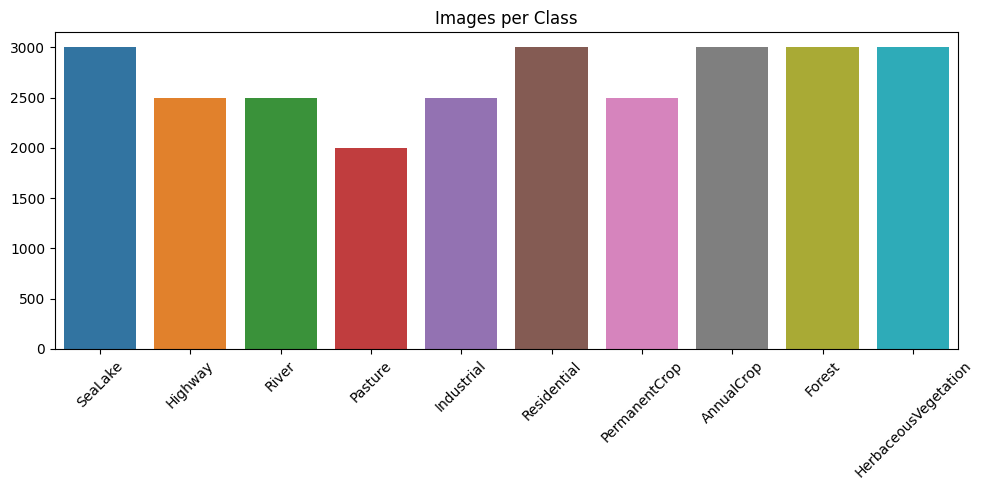

In [60]:
# Count images per class
class_dirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
class_counts = {cls: len(os.listdir(os.path.join(base_path, cls))) for cls in class_dirs}

# Plot 
plt.figure(figsize=(10, 5))

# Convert x to pd.Series
sns.barplot(
    x=pd.Series(list(class_counts.keys())),
    y=list(class_counts.values())
)

plt.xticks(rotation=45)
plt.title("Images per Class")
plt.tight_layout()
plt.show()

# **3. Image Generators**

In [61]:
img_height, img_width = 64, 64
batch_size = 64

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filename',
    y_col='ClassName',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filename',
    y_col='ClassName',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filename',
    y_col='ClassName',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 18900 validated image filenames belonging to 10 classes.
Found 5400 validated image filenames belonging to 10 classes.
Found 2700 validated image filenames belonging to 10 classes.


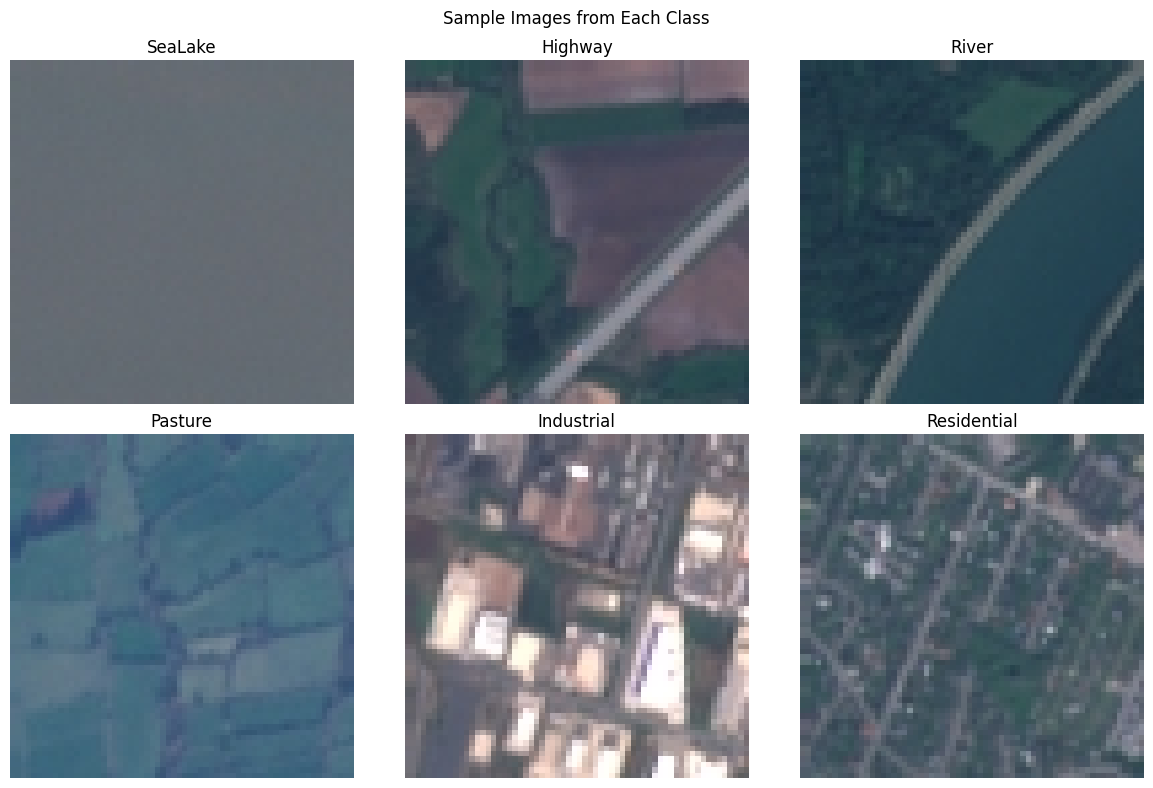

In [62]:
# Show one sample image per class (first 6)
plt.figure(figsize=(12, 8))
for i, cls in enumerate(class_dirs[:6]):
    class_path = os.path.join(base_path, cls)
    image_file = random.choice(os.listdir(class_path))
    img = load_img(os.path.join(class_path, image_file), target_size=(img_height, img_width))
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.suptitle("Sample Images from Each Class")
plt.tight_layout()
plt.show()

# **4. Build CNN Model**

In [63]:
num_classes = len(train_generator.class_indices)

model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model before training
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# **5. Train the Model**

In [64]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # increase to 20 or more if needed
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


296/296 ━━━━━━━━━━━━━━━━━━━━ 28s 83ms/step - accuracy: 0.3472 - loss: 1.7045 - val_accuracy: 0.6463 - val_loss: 0.9832
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - accuracy: 0.6400 - loss: 1.0087 - val_accuracy: 0.7294 - val_loss: 0.7661
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - accuracy: 0.7040 - loss: 0.8318 - val_accuracy: 0.7141 - val_loss: 0.7853
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step - accuracy: 0.7195 - loss: 0.7828 - val_accuracy: 0.7874 - val_loss: 0.5846
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.7690 - loss: 0.6601 - val_accuracy: 0.7657 - val_loss: 0.6357
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.7735 - loss: 0.6394 - val_accuracy: 0.7867 - val_loss: 0.5898
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 25s 83ms/step - accuracy: 0.7887 - loss: 0.6036 - val_accuracy: 0.7535 - val_loss: 0.6891
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step - accuracy: 0.7952 - loss: 0.5692 - val_accurac

# **Performance Analysis**

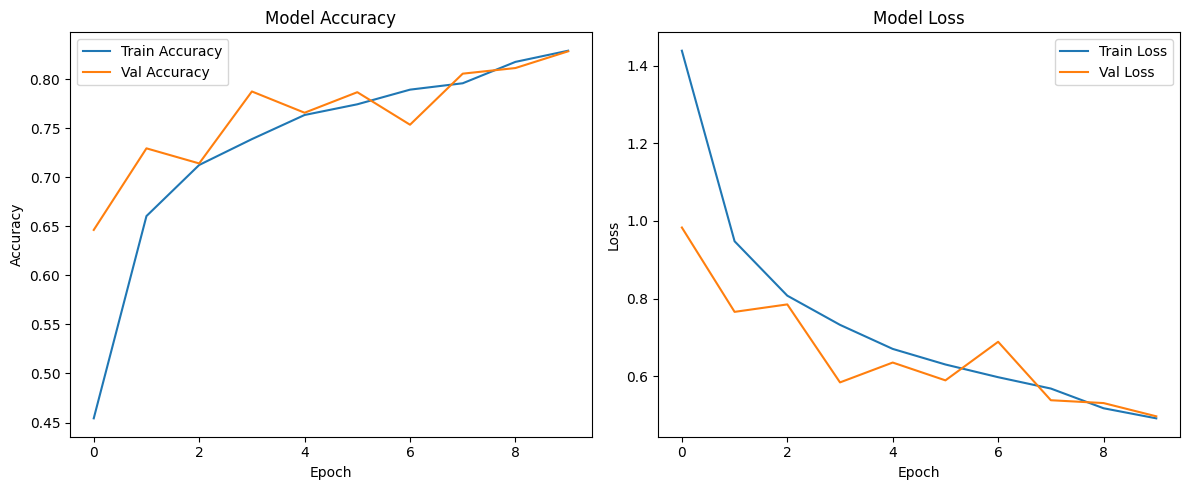

In [65]:
# Accuracy and Loss over Epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **Classification report**

In [66]:
val_preds = model.predict(val_generator)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_labels))

85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step
                      precision    recall  f1-score   support

          AnnualCrop       0.89      0.84      0.87       600
              Forest       0.93      0.92      0.93       600
HerbaceousVegetation       0.76      0.78      0.77       600
             Highway       0.69      0.74      0.71       500
          Industrial       0.97      0.81      0.89       500
             Pasture       0.74      0.85      0.80       400
       PermanentCrop       0.73      0.64      0.68       500
         Residential       0.83      0.99      0.90       600
               River       0.87      0.64      0.74       500
             SeaLake       0.87      0.99      0.92       600

            accuracy                           0.83      5400
           macro avg       0.83      0.82      0.82      5400
        weighted avg       0.83      0.83      0.83      5400



# **confusion matrix**

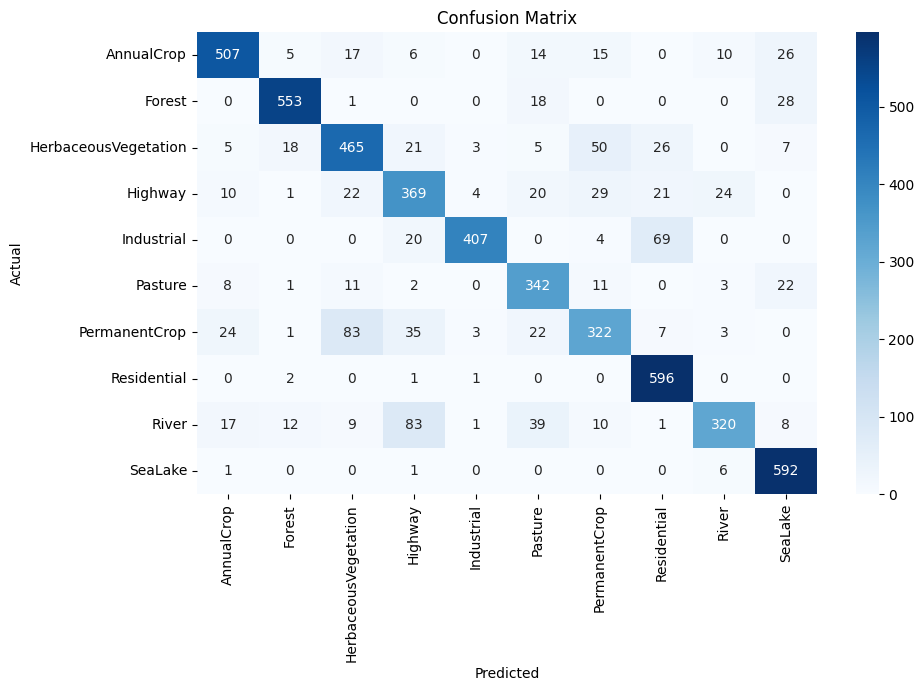

In [67]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **6. Evaluate on Test Set**

In [68]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2%}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8283 - loss: 0.4842
Test Accuracy: 82.85%


# **ANN Model**

In [69]:
# Convert 3D image input to 1D for ANN
input_shape_flat = img_height * img_width * 3
# Define ANN model architecture
ann_model = models.Sequential([
    layers.Input(shape=(input_shape_flat,)),   # Input layer (1D)
    layers.Dense(512, activation='relu'),      # First hidden layer
    layers.Dropout(0.3),                        # Dropout for regularization
    layers.Dense(256, activation='relu'),      # Second hidden layer
    layers.Dropout(0.3),                        # Dropout again
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

In [70]:
# Convert generator output to flat input for ANN
def flatten_generator(generator):
    X, y = [], []
    for batch_x, batch_y in generator:
        batch_flat = batch_x.reshape(batch_x.shape[0], -1)
        X.extend(batch_flat)
        y.extend(batch_y)
        if len(X) >= generator.samples:
            break
    return np.array(X), np.array(y)

# Apply to train and validation sets
X_train_ann, y_train_ann = flatten_generator(train_generator)
X_val_ann, y_val_ann = flatten_generator(val_generator)

In [71]:
# Compile the model
ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [72]:
# Train the ANN model
ann_history = ann_model.fit(
    X_train_ann, y_train_ann,
    validation_data=(X_val_ann, y_val_ann),
    epochs=10
)

Epoch 1/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1630 - loss: 2.6029 - val_accuracy: 0.2485 - val_loss: 1.9050
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2205 - loss: 1.9992 - val_accuracy: 0.2846 - val_loss: 1.9104
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2265 - loss: 1.9764 - val_accuracy: 0.2909 - val_loss: 1.8388
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2441 - loss: 1.9702 - val_accuracy: 0.3069 - val_loss: 1.8353
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2502 - loss: 1.9422 - val_accuracy: 0.3178 - val_loss: 1.7777
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2595 - loss: 1.9350 - val_accuracy: 0.3207 - val_loss: 1.7668
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2519 - loss: 1.9328 - val_accuracy: 0.3267 - val_loss: 1.7649
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2585 - loss: 1.9223 - val_accuracy: 0.

# **CNN vs ANN Performance Comparison**

CNN Validation Accuracy: 0.8283
ANN Validation Accuracy: 0.2928


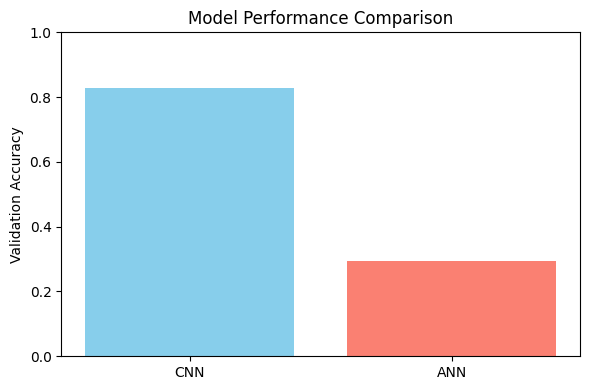

In [73]:
# Final Validation Accuracy Comparison
cnn_val_acc = history.history['val_accuracy'][-1]
ann_val_acc = ann_history.history['val_accuracy'][-1]

print(f"CNN Validation Accuracy: {cnn_val_acc:.4f}")
print(f"ANN Validation Accuracy: {ann_val_acc:.4f}")

# Bar Chart Comparison
plt.figure(figsize=(6, 4))
plt.bar(['CNN', 'ANN'], [cnn_val_acc, ann_val_acc], color=['skyblue', 'salmon'])
plt.ylabel('Validation Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()